<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Chile_France_Hubei_Italy_Spain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

In [3]:
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030


In [0]:
index_Chile = cases[cases['Country/Region'] == 'Chile'].index[0]
index_France = cases[cases['Province/State'] == 'France'].index[0]
index_Hubei = cases[cases['Province/State'] == 'Hubei'].index[0]
index_Italy = cases[cases['Country/Region'] == 'Italy'].index[0]
index_Spain = cases[cases['Country/Region'] == 'Spain'].index[0]

In [0]:
Chile_cases = cases.iloc[index_Chile,4:]
France_cases = cases.iloc[index_France,4:]
Hubei_cases = cases.iloc[index_Hubei,4:]
Italy_cases = cases.iloc[index_Italy,4:]
Spain_cases = cases.iloc[index_Spain,4:]

In [0]:
Chile100 = Chile_cases[Chile_cases>100]
France100 = France_cases[France_cases>100]
Hubei100 = Hubei_cases[Hubei_cases>100]
Italy100 = Italy_cases[Italy_cases>100]
Spain100 = Spain_cases[Spain_cases>100]

In [0]:
France_lockdown = '2020-03-18'
Italy_lockdown = '2020-03-10'
Spain_lockdown = '2020-03-15'
Hubei_lockdown = '2020-01-24'

In [8]:
France100.head(1)

3/1/20    130
Name: 157, dtype: object

In [9]:
Italy100.head(1)

2/23/20    155
Name: 16, dtype: object

In [10]:
Spain100.head(1)

3/2/20    120
Name: 18, dtype: object

In [11]:
Hubei100.head(1)

1/22/20    444
Name: 154, dtype: object

In [0]:
France_day100 = '2020-03-01'
Italy_day100 = '2020-02-23'
Spain_day100 = '2020-03-02'
Hubei_day100 = '2020-01-22'

In [0]:
France_gap = (pd.to_datetime(France_lockdown) - pd.to_datetime(France_day100)).days
Italy_gap = (pd.to_datetime(Italy_lockdown) - pd.to_datetime(Italy_day100)).days
Spain_gap = (pd.to_datetime(Spain_lockdown) - pd.to_datetime(Spain_day100)).days
Hubei_gap = (pd.to_datetime(Hubei_lockdown) - pd.to_datetime(Hubei_day100)).days

In [14]:
France_gap, Italy_gap, Spain_gap, Hubei_gap

(17, 16, 13, 2)

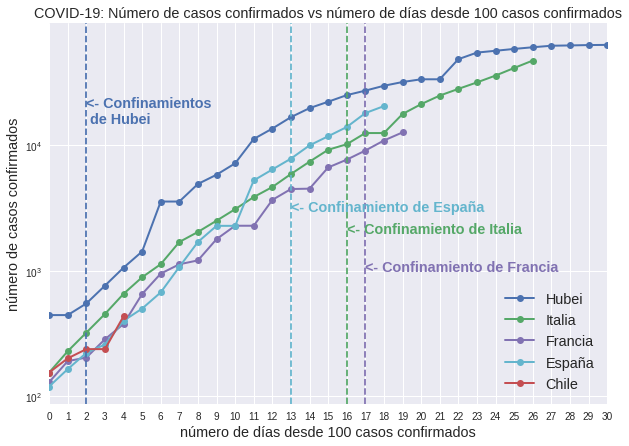

In [15]:
fig, ax = plt.subplots(figsize=(10,7))

plt.plot(np.arange(len(Hubei100)), Hubei100, label='Hubei', linewidth=2, color='C0', marker='o')
plt.plot(np.arange(len(Italy100)), Italy100, label='Italia', linewidth=2, color='C1', marker='o')
plt.plot(np.arange(len(France100)), France100, label='Francia', linewidth=2, color='C3', marker='o')
plt.plot(np.arange(len(Spain100)), Spain100, label='España', linewidth=2, color='C5', marker='o')
plt.plot(np.arange(len(Chile100)), Chile100, label='Chile', linewidth=2, color='C2', marker='o')

plt.axvline(Hubei_gap, color='C0', linestyle='dashed')
plt.axvline(Italy_gap, color='C1', linestyle='dashed')
plt.axvline(France_gap, color='C3', linestyle='dashed')
plt.axvline(Spain_gap, color='C5', linestyle='dashed')

plt.annotate('<- Confinamientos\n de Hubei', (Hubei_gap,15000), color='C0', fontsize='x-large', fontweight='bold')
plt.annotate('<- Confinamiento de Francia', (France_gap,1000.0), color='C3', fontsize='x-large', fontweight='bold')
plt.annotate('<- Confinamiento de Italia', (Italy_gap,2000.0), color='C1', fontsize='x-large', fontweight='bold')
plt.annotate('<- Confinamiento de España', (Spain_gap,3000.0), color='C5', fontsize='x-large', fontweight='bold')

ax.set_title('COVID-19: Número de casos confirmados vs número de días desde 100 casos confirmados', fontsize='x-large')
ax.set_xlabel('número de días desde 100 casos confirmados', fontsize='x-large')
ax.set_ylabel('número de casos confirmados', fontsize='x-large')
ax.set_xticks(np.arange(len(Hubei100)))
plt.yscale("log")
plt.xlim(0,30)
plt.legend(fontsize='x-large')
plt.show()